In [136]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
import cv2
from skimage.transform import resize   # for resizing images
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Read in frames and create features/labels arrays: 

In [196]:
# input: a list of frames from one single video (one rep)
# output: a summarized frame in a numpy array representing a single video (one rep) and the class it belongs to (good or bad)
def summarize_frames(list_of_frame_fileNames):
    list_of_frames = []
    # loop through each frame filename and add pixels to a list
    for fileName in list_of_frame_fileNames:
        img = cv2.imread(fileName)# remove the 0 to keep in normal color scheme (not gray scale)
        resized_img = resize(img, preserve_range=True, output_shape=(224,224)).astype(int)
        list_of_frames.append(resized_img)
    # convert list to a numpy array
    array_of_frames = np.asarray(list_of_frames)
    # normalizing the pixel values
    normArray_frames = array_of_frames / 255.0
    # summarize all frames into a single frame
    summarized_frame = np.mean(normArray_frames, axis=0)
#     print(summarized_frame.shape)
    # Checking whether the form is in class "Good" or "Bad"
    if "Good" in list_of_frame_fileNames[0]:
        label = 1
    else:
        label = 0
        
    return summarized_frame, label
    
    

main_folder = "New_Training_Video_Frames/"
# grab list of folders (excludes current folder)
# folders = [x[0] for x in os.walk(main_folder)][1:]
exercise_folders = os.listdir(main_folder)
exercise_folders.remove('.DS_Store')
exercise_folders.remove('BenchPress')
summarized_features = []
print(exercise_folders)
labels = []
count = 0
# loop through each exercise
for exercise in exercise_folders:
    # Grab each folder(video) that contains frames
    video_folders = os.listdir(main_folder + exercise)
    video_folders.remove('.DS_Store')
    print("Loading in " + str(len(video_folders)) + " videos of " + exercise)
    for video in video_folders:
        # Grab the frames associated with a specific video
        filePath = main_folder + exercise + "/" + video + "/"
        frames = os.listdir(main_folder + exercise + "/" + video)
        list_of_frame_filePaths = [filePath + x for x in frames]
#         list_of_frame_filePaths.remove('New_Training_Video_Frames/Deadlift/.DS_Store')
        print("Summarizing frames for " + video)
        summarized_frame, label = summarize_frames(list_of_frame_filePaths)
        summarized_features.append(summarized_frame)
        labels.append(label)

print("Process Complete")
# print(summarized_features)

['Deadlift']
Loading in 68 videos of Deadlift
Summarizing frames for Deadlift_Bad(1)


KeyboardInterrupt: 

In [128]:
# convert features and labels lists to arrays
summarized_features = np.asarray(summarized_features)
labels = np.asarray(labels)

print(summarized_features.shape)
print(labels.shape)

(68, 224, 224, 3)
(68,)


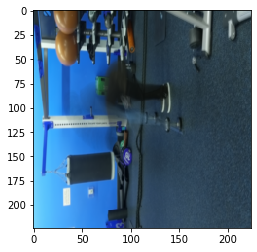

In [133]:
plt.imshow(summarized_features[0])

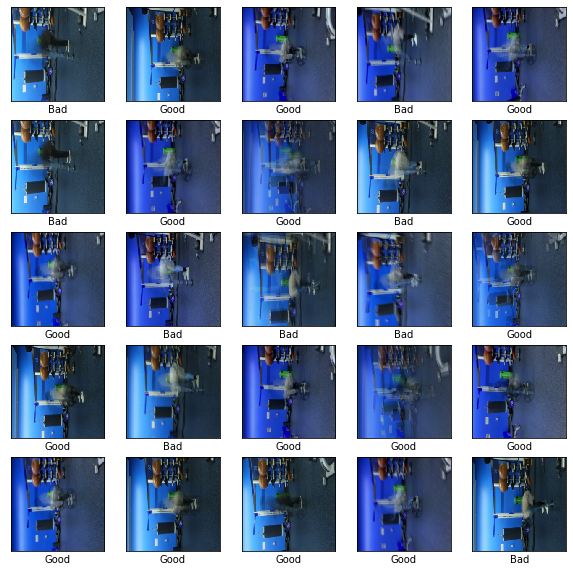

In [135]:
# printing out all of the separate frames
class_dict = {1: "Good", 0: "Bad"}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(summarized_features[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_dict[labels[i]])
plt.show()

# Split up data into train/test:

In [145]:
X_train, X_test, y_train, y_test = train_test_split(summarized_features, labels, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Checking distribution of classes in train and test:")
print(y_train)
print(y_test)

(45, 224, 224, 3)
(23, 224, 224, 3)
(45,)
(23,)
Checking distribution of classes in train and test:
[1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 1]
[0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1]


# Set up model and train:

In [138]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 45 samples, validate on 23 samples
Epoch 1/10
45/45 [==============================] - 4s 85ms/sample - loss: 1.8529 - accuracy: 0.1333 - val_loss: 4.1460 - val_accuracy: 0.6087
Epoch 2/10
45/45 [==============================] - 3s 58ms/sample - loss: 2.5982 - accuracy: 0.6889 - val_loss: 0.7331 - val_accuracy: 0.4348
Epoch 3/10
45/45 [==============================] - 3s 57ms/sample - loss: 0.6701 - accuracy: 0.5111 - val_loss: 0.7375 - val_accuracy: 0.6087
Epoch 4/10
45/45 [==============================] - 3s 57ms/sample - loss: 0.5567 - accuracy: 0.6889 - val_loss: 0.5947 - val_accuracy: 0.7391
Epoch 5/10
45/45 [==============================] - 3s 62ms/sample - loss: 0.4101 - accuracy: 1.0000 - val_loss: 0.5428 - val_accuracy: 0.6522
Epoch 6/10
45/45 [==============================] - 3s 60ms/sample - loss: 0.3511 - accuracy: 0.9111 - val_loss: 0.4527 - val_accuracy: 0.7826
Epoch 7/10
45/45 [==============================] - 3s 59ms/sample - loss: 0.2402 - accuracy: 0.95

# Evaluate results of model:

23/1 - 0s - loss: 0.3362 - accuracy: 0.8261


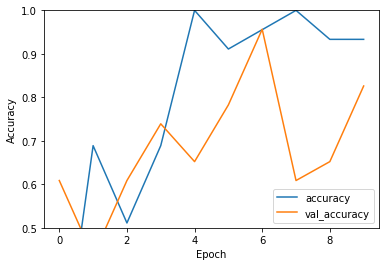

In [140]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [141]:
print(test_acc)

0.82608694


# Test on extra unseen data:

In [197]:
unseen_summarized_features = []
unseen_labels = []
# Load in unseen data
list_of_videos = os.listdir('Unseen_Test_Video_Frames/Deadlift/')
list_of_videos.remove('.DS_Store')
print(list_of_videos)
for video in list_of_videos:
    list_of_frames = os.listdir('Unseen_Test_Video_Frames/Deadlift/' + video + "/")
    list_of_frame_filePaths = ['Unseen_Test_Video_Frames/Deadlift/' + video + "/" + x for x in list_of_frames]
#     print(list_of_frame_filePaths)
#         list_of_frame_filePaths.remove('New_Training_Video_Frames/Deadlift/.DS_Store')
    print("Summarizing frames for " + video)
    summarized_frame, label = summarize_frames(list_of_frame_filePaths)
    print(label)
    unseen_summarized_features.append(summarized_frame)
    unseen_labels.append(label)
# Summarize frames and split into features and labels arrays
# test using trained network


['Deadlift_Good', 'Deadlift_Bad']
Summarizing frames for Deadlift_Good
1
Summarizing frames for Deadlift_Bad
0


In [198]:
# convert features and labels lists to arrays
unseen_summarized_features = np.asarray(unseen_summarized_features)
unseen_labels = np.asarray(unseen_labels)

print(unseen_summarized_features.shape)
print(unseen_labels.shape)

(2, 224, 224, 3)
(2,)


In [199]:
pred = model.predict_classes(unseen_summarized_features)

In [200]:
print(pred)
print(unseen_labels)

[1 0]
[1 0]
